In [122]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing/bank-additional-names.txt
/kaggle/input/bank-marketing/bank-additional-full.csv


In [123]:
df = pd.read_csv("/kaggle/input/bank-marketing/bank-additional-full.csv", sep = ";")

In [124]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [125]:
df.shape

(41188, 21)

In [126]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [127]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [129]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [130]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [131]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [132]:
np.unique(df['y'], return_counts = True) 

(array(['no', 'yes'], dtype=object), array([36548,  4640]))

In [133]:
np.unique(df['contact'], return_counts = True) 

(array(['cellular', 'telephone'], dtype=object), array([26144, 15044]))

In [134]:
np.unique(df[df['contact'] == 'cellular']['y'], return_counts = True) 

(array(['no', 'yes'], dtype=object), array([22291,  3853]))

In [135]:
np.unique(df[df['contact'] == 'telephone']['y'], return_counts = True) 

(array(['no', 'yes'], dtype=object), array([14257,   787]))

In [136]:
df = df.drop(['contact'], axis = 1)

In [137]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [138]:
np.unique(df['day_of_week'], return_counts = True)

(array(['fri', 'mon', 'thu', 'tue', 'wed'], dtype=object),
 array([7827, 8514, 8623, 8090, 8134]))

In [139]:
np.unique(df[df['day_of_week'] == 'mon']['y'], return_counts = True) 

(array(['no', 'yes'], dtype=object), array([7667,  847]))

In [140]:
np.unique(df[df['day_of_week'] == 'tue']['y'], return_counts = True)

(array(['no', 'yes'], dtype=object), array([7137,  953]))

In [141]:
np.unique(df[df['day_of_week'] == 'wed']['y'], return_counts = True)

(array(['no', 'yes'], dtype=object), array([7185,  949]))

In [142]:
np.unique(df[df['day_of_week'] == 'thu']['y'], return_counts = True)

(array(['no', 'yes'], dtype=object), array([7578, 1045]))

In [143]:
np.unique(df[df['day_of_week'] == 'fri']['y'], return_counts = True)

(array(['no', 'yes'], dtype=object), array([6981,  846]))

In [144]:
df = df.drop(['day_of_week'], axis = 1)

In [145]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')

In [146]:
np.unique(df['age'], return_counts = True)

(array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 91, 92, 94, 95, 98]),
 array([   5,   28,   42,   65,  102,  137,  226,  463,  598,  698,  851,
        1001, 1453, 1714, 1947, 1846, 1833, 1745, 1759, 1780, 1475, 1407,
        1432, 1161, 1278, 1142, 1055, 1011, 1103, 1030,  928,  979,  839,
         875,  754,  779,  733,  684,  648,  704,  646,  576,  463,  283,
          73,   62,   55,   57,   44,   57,   26,   33,   34,   47,   53,
          34,   34,   32,   24,   34,   20,   27,   14,   31,   20,   17,
          17,    7,   15,    8,    1,   22,    2,    2,    4,    1,    1,
           2]))

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

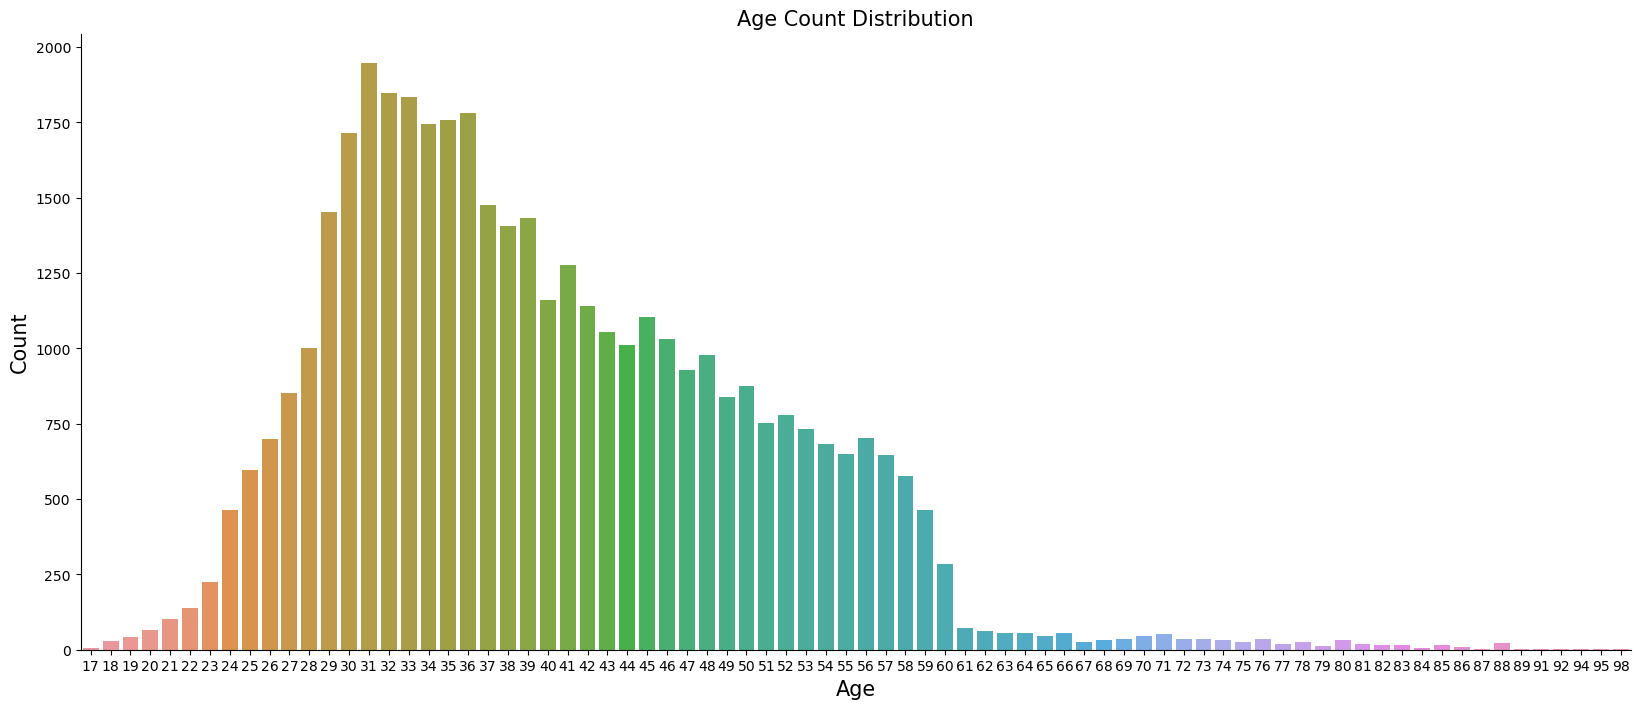

In [148]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = df)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

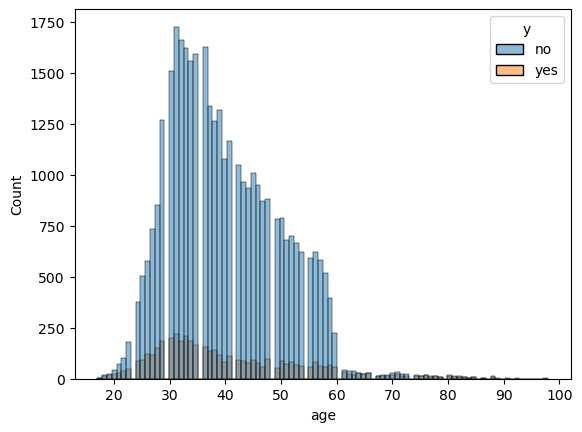

In [149]:
sns.histplot(df, x = 'age', hue = 'y')
plt.show()

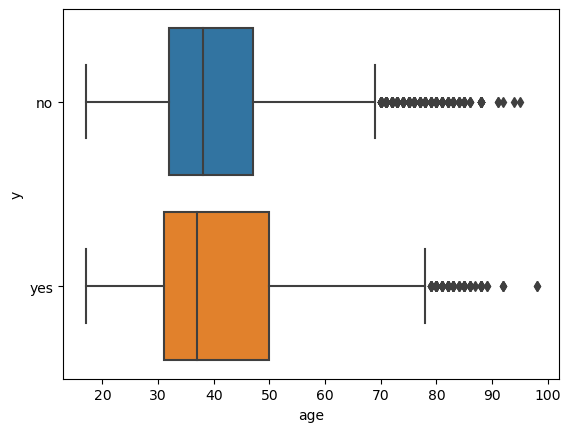

In [150]:
sns.boxplot(df, x='age', y='y')
plt.show()

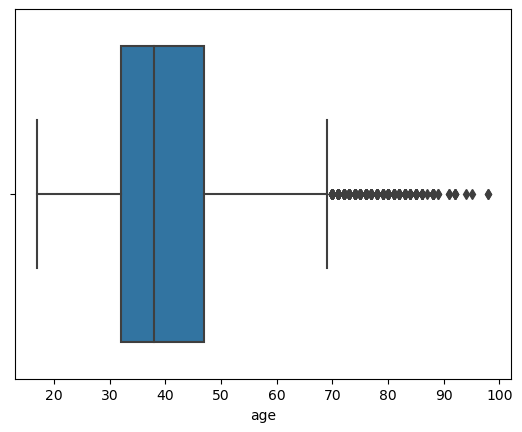

In [151]:
sns.boxplot(df, x='age')
plt.show()

In [152]:
# Quartiles
print('1º Quartile: ', df['age'].quantile(q = 0.25))
print('2º Quartile: ', df['age'].quantile(q = 0.50))
print('3º Quartile: ', df['age'].quantile(q = 0.75))
print('4º Quartile: ', df['age'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Ages above', df['age'].quantile(q = 0.75) + 
                      1.5*(df['age'].quantile(q = 0.75) - df['age'].quantile(q = 0.25)), 'are outliers')
print('Numerber of outliers: ', df[df['age'] > 69.6]['age'].count())

1º Quartile:  32.0
2º Quartile:  38.0
3º Quartile:  47.0
4º Quartile:  98.0
Ages above 69.5 are outliers
Numerber of outliers:  469


* Here, 69.5 doesn't seem to be an outlier intuitionally as ages above 70 are quite possible, it's just that the data points are lesser in number at higher ages. So, we won't consider this as outliers, this was done just for EDA.


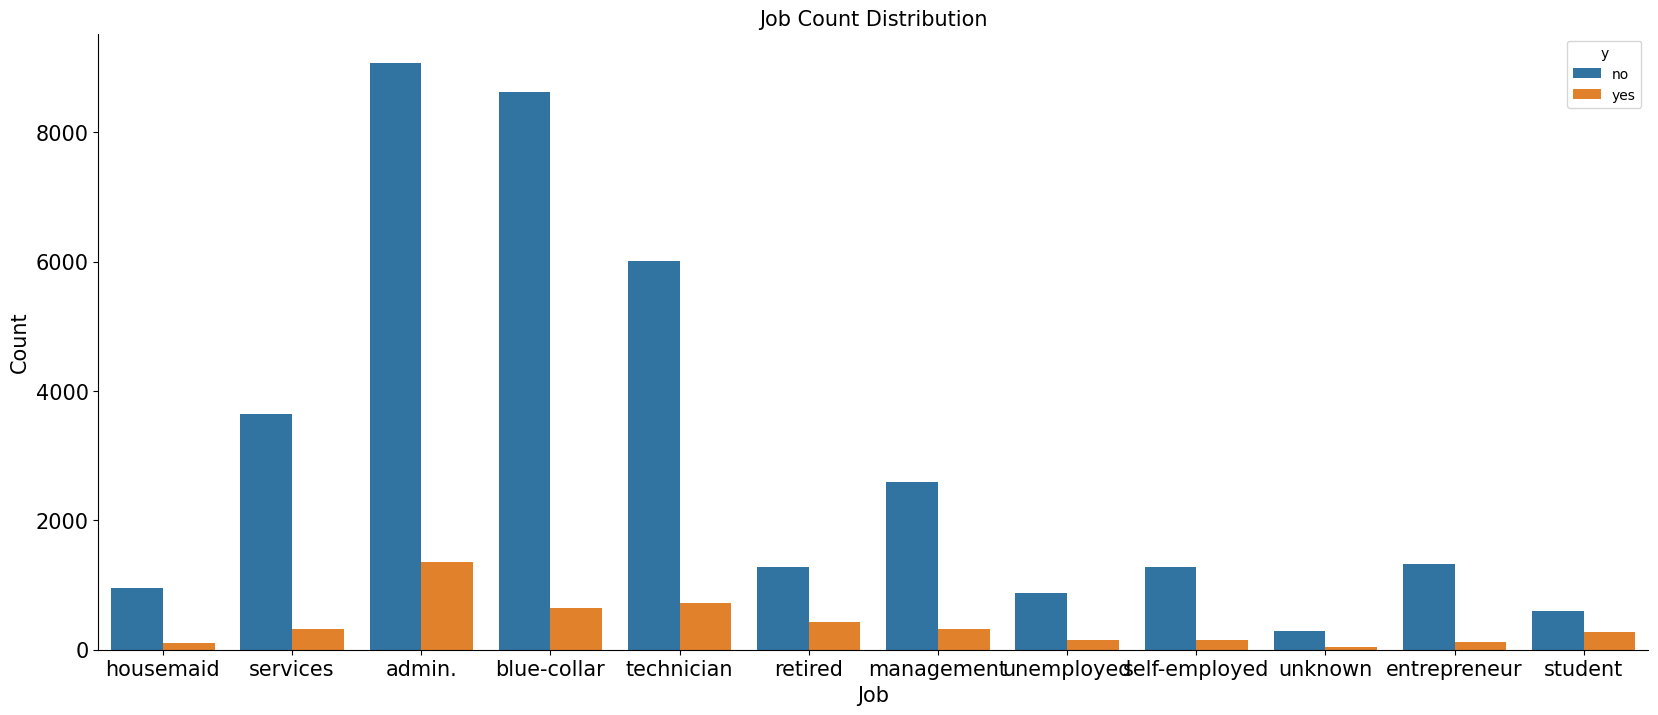

In [153]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job',hue = 'y', data = df)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

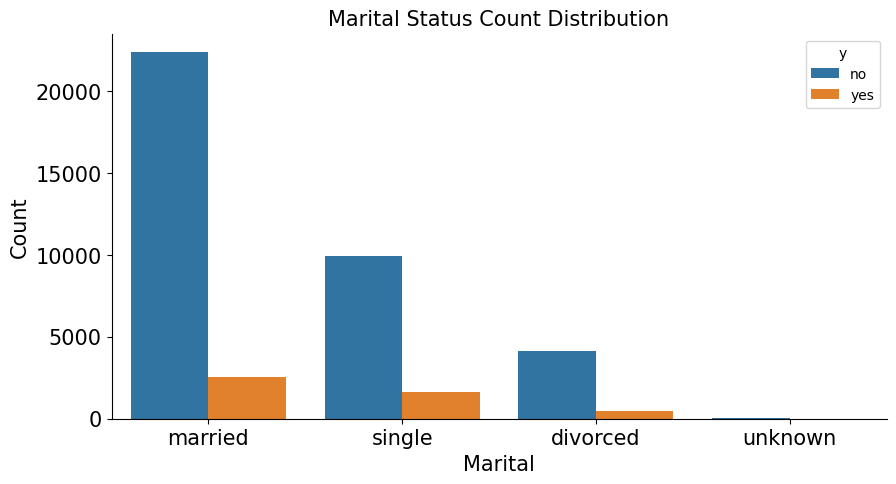

In [154]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital',hue = 'y', data = df)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital Status Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

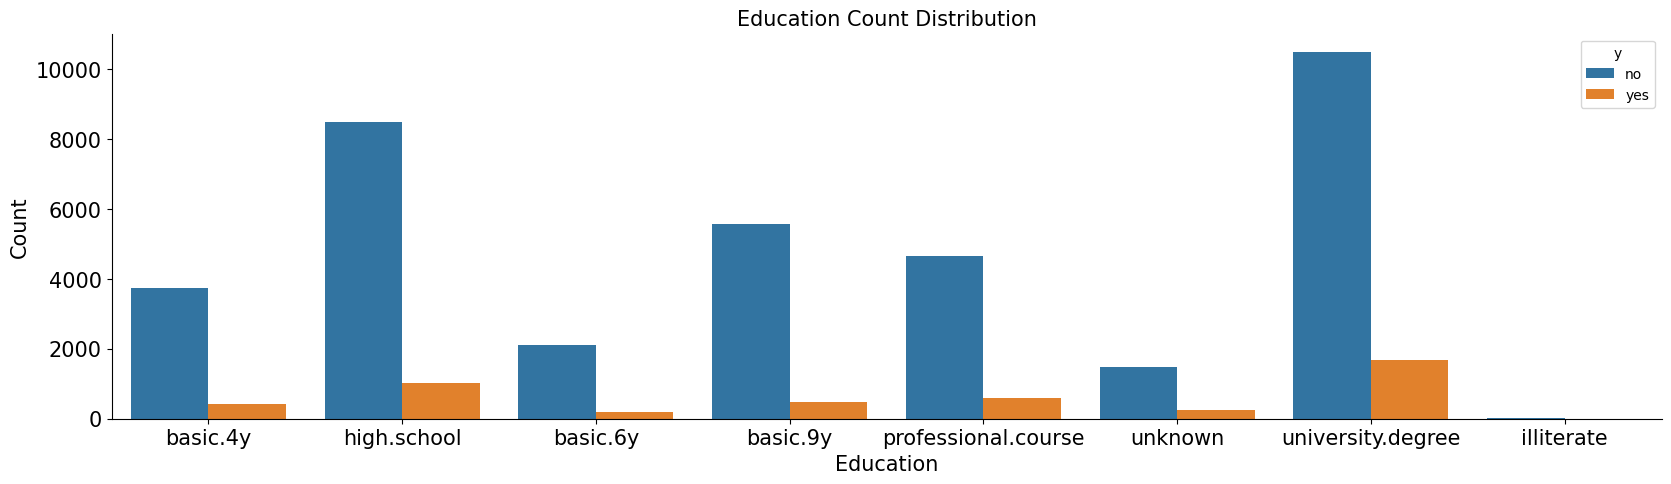

In [155]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education',hue = 'y', data = df)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

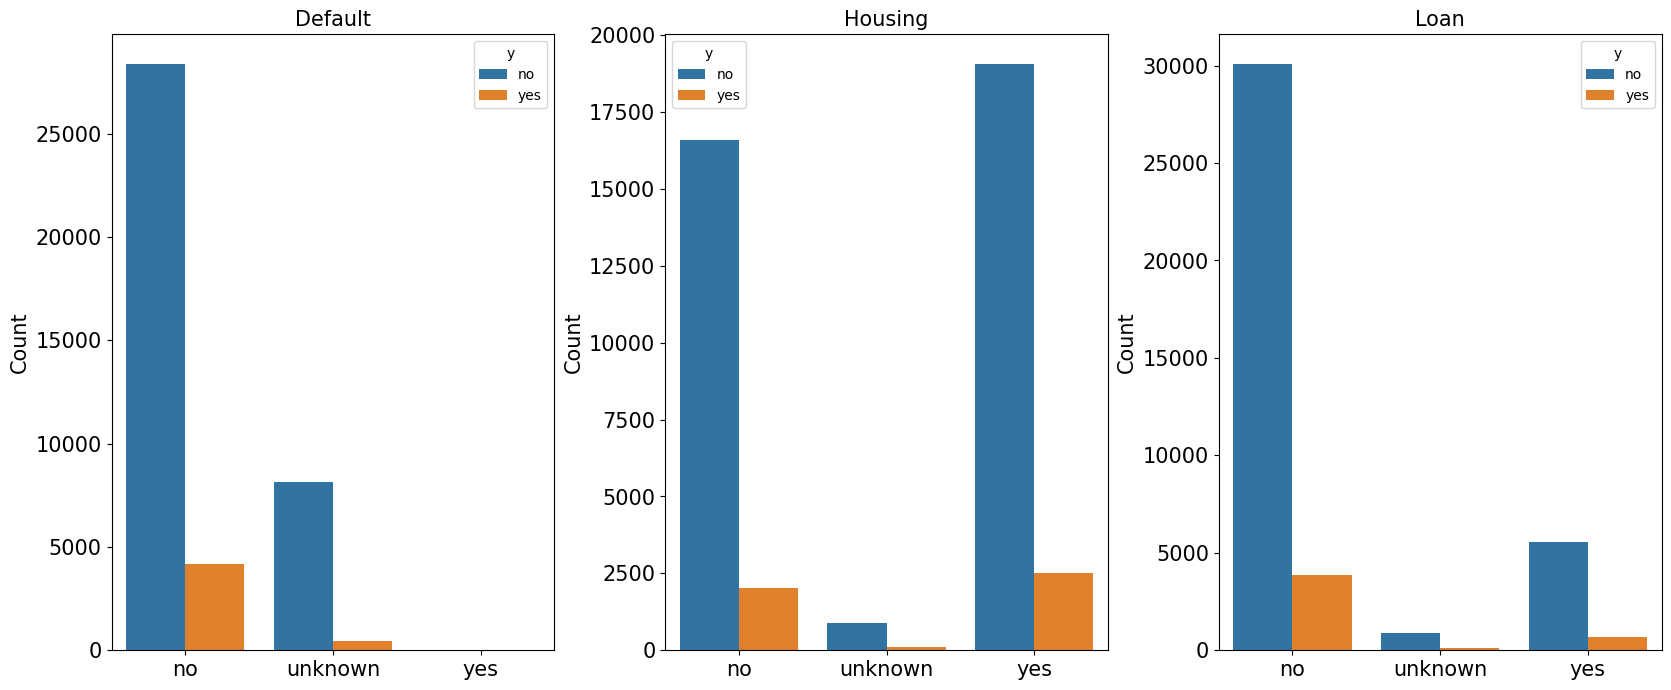

In [156]:
# Default, has credit in default ?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', hue = 'y', data = df, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing, has housing loan ?
sns.countplot(x = 'housing', data = df, hue = 'y', ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan, has personal loan ?
sns.countplot(x = 'loan',hue = 'y', data = df, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

In [157]:
print('Default:\n No credit in default:'     , df[df['default'] == 'no']     ['age'].count(),
              '\n Unknown credit in default:', df[df['default'] == 'unknown']['age'].count(),
              '\n Credit in default:' , df[df['default'] == 'yes']    ['age'].count())

Default:
 No credit in default: 32588 
 Unknown credit in default: 8597 
 Credit in default: 3


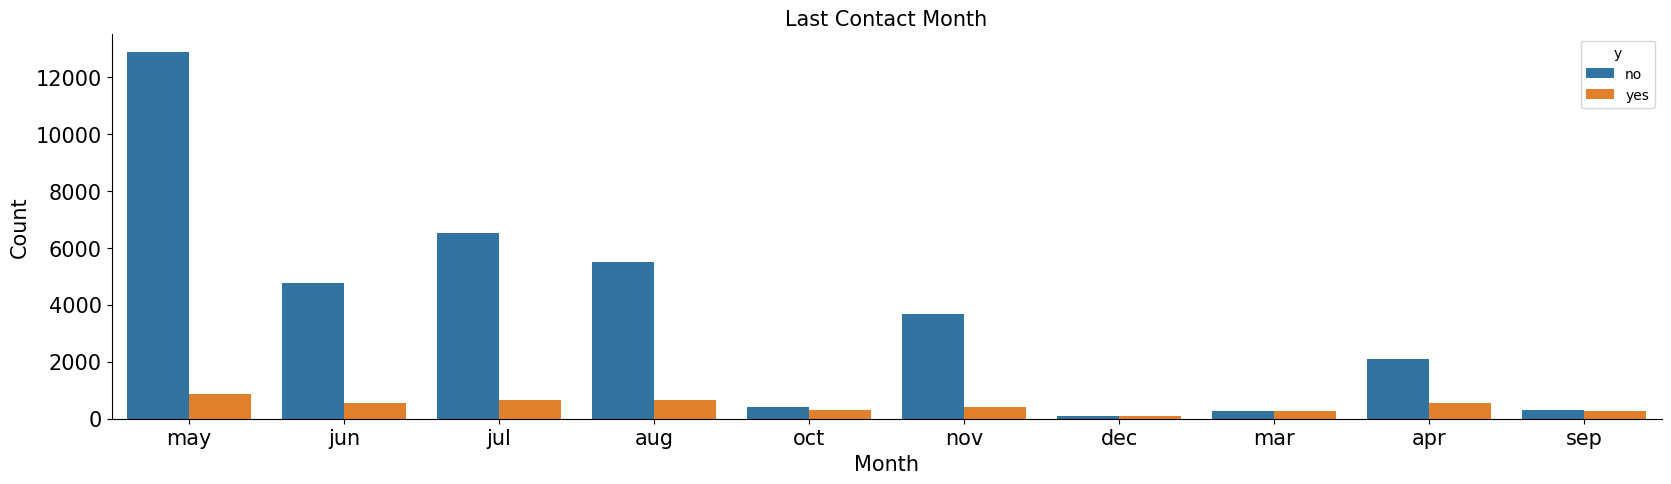

In [158]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'month',hue = 'y', data = df)
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Last Contact Month', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

In [159]:
df = df.drop(['duration'], axis = 1)

In [160]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
df['job']      = labelencoder_X.fit_transform(df['job']) 
df['marital']  = labelencoder_X.fit_transform(df['marital']) 
df['education']= labelencoder_X.fit_transform(df['education']) 
df['default']  = labelencoder_X.fit_transform(df['default']) 
df['housing']  = labelencoder_X.fit_transform(df['housing']) 
df['loan']     = labelencoder_X.fit_transform(df['loan']) 
df['month']     = labelencoder_X.fit_transform(df['month']) 
df['poutcome']     = labelencoder_X.fit_transform(df['poutcome']) 
df['y']     = labelencoder_X.fit_transform(df['y']) 

In [161]:
df.tail()

,age,job,marital,education,default,housing,loan,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,5,1,5,0,2,0,7,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,7,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,7,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,7,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41187,74,5,1,5,0,2,0,7,3,999,1,0,-1.1,94.767,-50.8,1.028,4963.6,0


In [162]:
y = df['y']

In [163]:
df = df.drop(['y'], axis = 1)

In [164]:
df.head()

,age,job,marital,education,default,housing,loan,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,6,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,6,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,6,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,6,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,6,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


In [165]:
df.shape

(41188, 17)

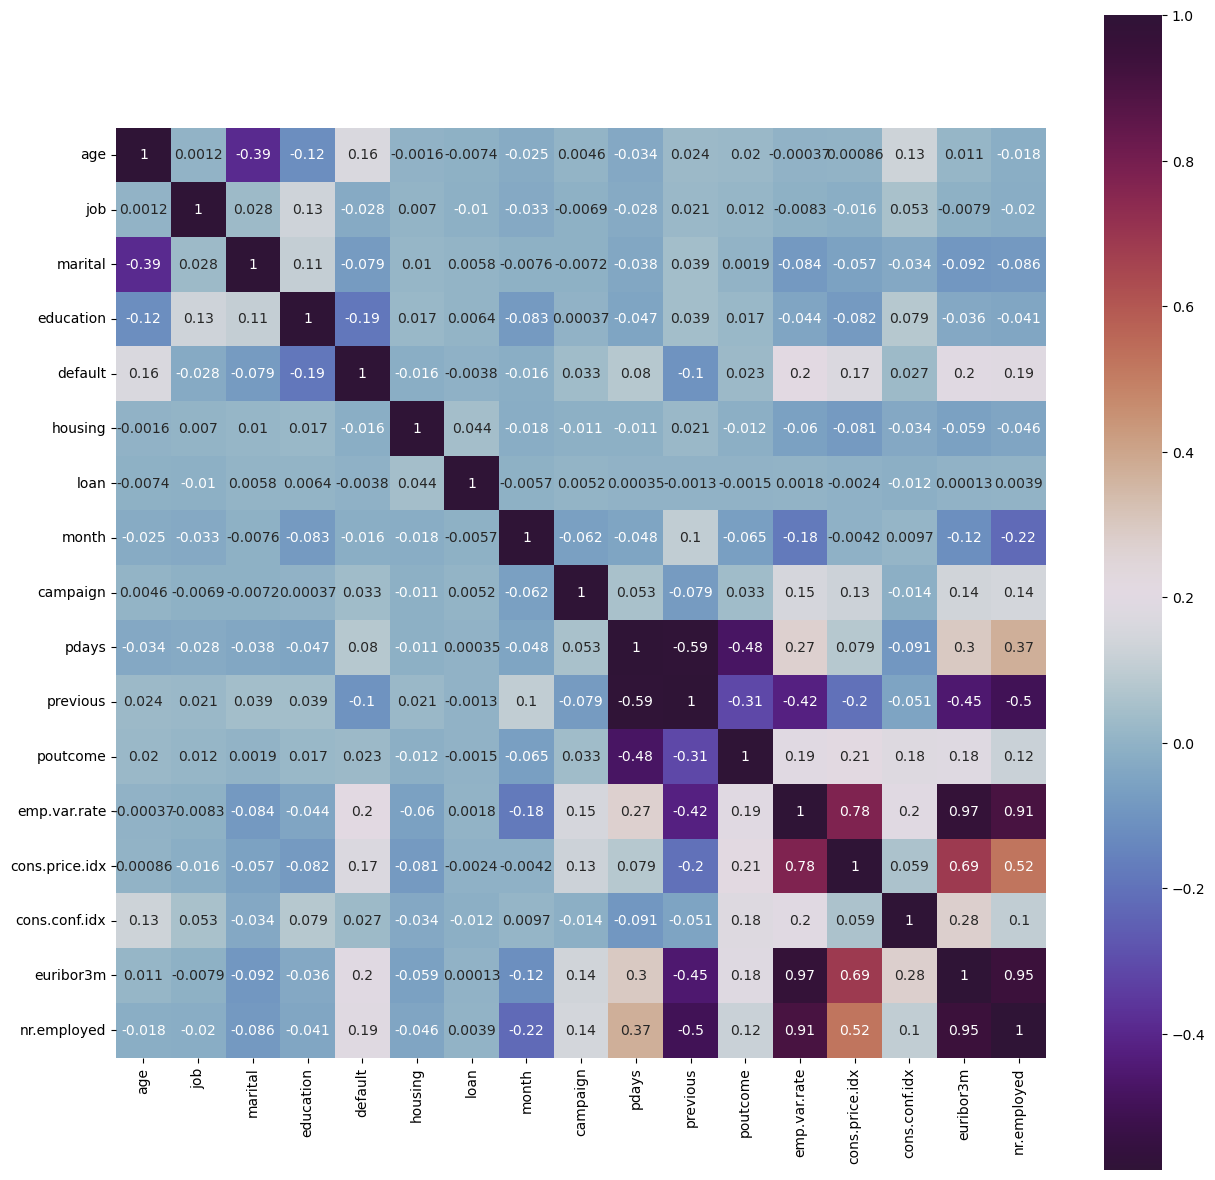

In [166]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),square=True,annot=True,cmap= 'twilight_shifted')
plt.show()

In [167]:
corr = df.corr()
corr_greater_than_90 = corr[corr>=.9]
corr_greater_than_90

,age,job,marital,education,default,housing,loan,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pdays,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


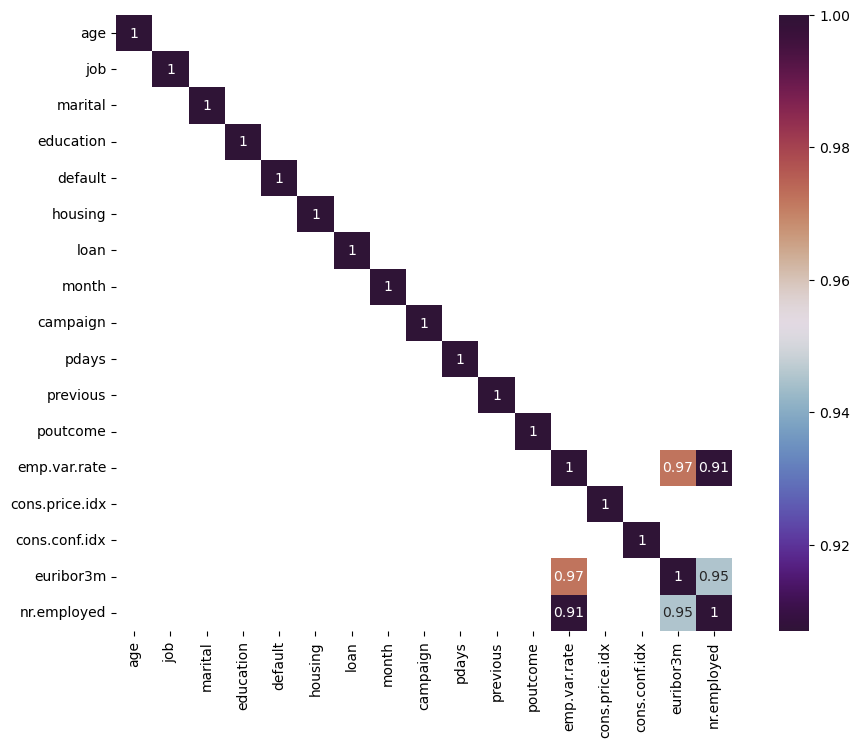

In [168]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_greater_than_90, square=True, cmap= 'twilight_shifted', annot = True);

In [169]:
df = df.drop(['euribor3m','nr.employed'], axis = 1)

In [170]:
df.head()

,age,job,marital,education,default,housing,loan,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx
0,56,3,1,0,0,0,0,6,1,999,0,1,1.1,93.994,-36.4
1,57,7,1,3,1,0,0,6,1,999,0,1,1.1,93.994,-36.4
2,37,7,1,3,0,2,0,6,1,999,0,1,1.1,93.994,-36.4
3,40,0,1,1,0,0,0,6,1,999,0,1,1.1,93.994,-36.4
4,56,7,1,3,0,0,2,6,1,999,0,1,1.1,93.994,-36.4


In [207]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.4, random_state = 42)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

In [208]:
X_train.shape

(24712, 15)

In [209]:
y_train.value_counts()

0    21925
1     2787
Name: y, dtype: int64

In [210]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train,y_train = sm.fit_resample(X_train,y_train)

In [211]:
y_train.value_counts()

0    21925
1    21925
Name: y, dtype: int64

In [212]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [223]:
#importing different classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn import model_selection

In [224]:
#creating dictionary for storing different models accuracy
model_comparison={}

In [221]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5,scoring="recall")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Logistic Regression']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 79.10%
Model F1-Score : 76.28%
Cross Val Accuracy: 69.30 %
Cross Val Standard Deviation: 3.07 %
              precision    recall  f1-score   support

           0       0.82      0.94      0.87     12718
           1       0.58      0.29      0.39      3758

    accuracy                           0.79     16476
   macro avg       0.70      0.61      0.63     16476
weighted avg       0.76      0.79      0.76     16476



In [225]:
classifier=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5,scoring="recall")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Decision Tree']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 80.63%
Model F1-Score : 79.18%
Cross Val Accuracy: 89.19 %
Cross Val Standard Deviation: 9.75 %
              precision    recall  f1-score   support

           0       0.86      0.91      0.89     13821
           1       0.36      0.25      0.29      2655

    accuracy                           0.81     16476
   macro avg       0.61      0.58      0.59     16476
weighted avg       0.78      0.81      0.79     16476



k=1 84.73 (+/- 0.40)
k=2 88.72 (+/- 0.49)
k=3 88.18 (+/- 0.54)
k=4 89.27 (+/- 0.40)
k=5 89.01 (+/- 0.44)
k=6 89.58 (+/- 0.40)
k=7 89.33 (+/- 0.39)
k=8 89.53 (+/- 0.39)
k=9 89.46 (+/- 0.43)
k=10 89.57 (+/- 0.43)
k=11 89.48 (+/- 0.38)
k=12 89.63 (+/- 0.38)
k=13 89.57 (+/- 0.45)
k=14 89.62 (+/- 0.44)
k=15 89.62 (+/- 0.46)
k=16 89.64 (+/- 0.46)
k=17 89.62 (+/- 0.46)
k=18 89.72 (+/- 0.46)
k=19 89.69 (+/- 0.44)
k=20 89.75 (+/- 0.45)
k=21 89.71 (+/- 0.47)
k=22 89.75 (+/- 0.47)
k=23 89.70 (+/- 0.48)
k=24 89.74 (+/- 0.49)
k=25 89.71 (+/- 0.48)
The optimal number of neighbors is 19 with 89.7%


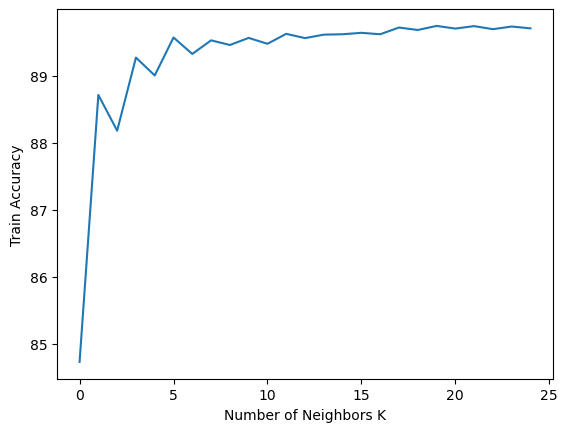

In [215]:

from sklearn.neighbors import KNeighborsClassifier

X_trainK, X_testK, y_trainK, y_testK = train_test_split(df, y, test_size = 0.2, random_state = 42)

#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=42)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()


k=1 87.78 (+/- 0.42)
k=2 87.25 (+/- 0.52)
k=3 87.54 (+/- 0.57)
k=4 86.91 (+/- 0.39)
k=5 86.34 (+/- 0.49)
k=6 85.84 (+/- 0.39)
k=7 85.41 (+/- 0.41)
k=8 85.23 (+/- 0.50)
k=9 84.85 (+/- 0.55)
k=10 84.69 (+/- 0.65)
k=11 84.47 (+/- 0.46)
k=12 84.31 (+/- 0.65)
k=13 84.07 (+/- 0.62)
k=14 83.88 (+/- 0.67)
k=15 83.52 (+/- 0.55)
k=16 83.39 (+/- 0.54)
k=17 83.21 (+/- 0.54)
k=18 83.00 (+/- 0.59)
k=19 82.85 (+/- 0.59)
k=20 82.74 (+/- 0.63)
k=21 82.64 (+/- 0.59)
k=22 82.44 (+/- 0.59)
k=23 82.28 (+/- 0.70)
k=24 82.25 (+/- 0.58)
k=25 82.19 (+/- 0.58)
The optimal number of neighbors is 0 with 87.8%


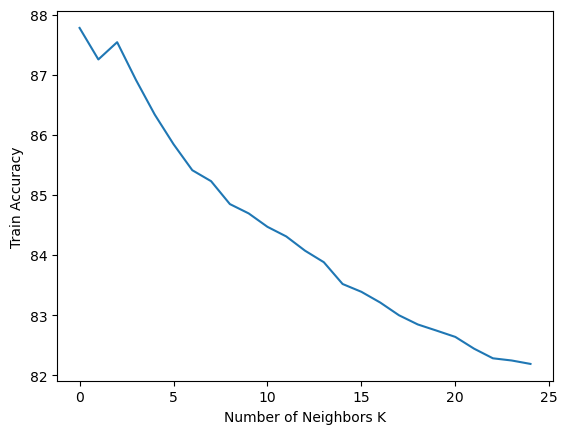

In [216]:
#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=42)
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [228]:
classifier=GaussianNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Naive Bayes']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 77.94%
Model F1-Score : 74.81%
Cross Val Accuracy: 71.48 %
Cross Val Standard Deviation: 1.17 %
              precision    recall  f1-score   support

           0       0.80      0.94      0.87     12532
           1       0.58      0.27      0.37      3944

    accuracy                           0.78     16476
   macro avg       0.69      0.61      0.62     16476
weighted avg       0.75      0.78      0.75     16476



In [234]:
classifier=RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Random Forest']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 84.75%
Model F1-Score : 84.44%
Cross Val Accuracy: 90.10 %
Cross Val Standard Deviation: 4.53 %
              precision    recall  f1-score   support

           0       0.91      0.92      0.91     14437
           1       0.37      0.34      0.35      2039

    accuracy                           0.85     16476
   macro avg       0.64      0.63      0.63     16476
weighted avg       0.84      0.85      0.84     16476



In [230]:
classifier = XGBClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Xg Boost']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 85.75%
Model F1-Score : 85.42%
Cross Val Accuracy: 86.34 %
Cross Val Standard Deviation: 5.78 %
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     14411
           1       0.42      0.38      0.40      2065

    accuracy                           0.86     16476
   macro avg       0.67      0.65      0.66     16476
weighted avg       0.85      0.86      0.85     16476



In [231]:
Model_com_df=pd.DataFrame(model_comparison).T
Model_com_df.columns=['Model Accuracy','Model F1-Score','CV Accuracy','CV std']
Model_com_df=Model_com_df.sort_values(by='Model F1-Score',ascending=False)
Model_com_df.style.format("{:.2%}").background_gradient(cmap='Blues')

,Model Accuracy,Model F1-Score,CV Accuracy,CV std
Xg Boost,85.75%,85.42%,86.34%,5.78%
Random Forest,84.75%,84.44%,90.10%,4.53%
Decision Tree,80.63%,79.18%,89.19%,9.75%
Naive Bayes,77.94%,74.81%,71.48%,1.17%


In [232]:
Model_com_df.style.highlight_max().set_caption("Maximum Score in each Column").format("{:.2%}")

,Model Accuracy,Model F1-Score,CV Accuracy,CV std
Xg Boost,85.75%,85.42%,86.34%,5.78%
Random Forest,84.75%,84.44%,90.10%,4.53%
Decision Tree,80.63%,79.18%,89.19%,9.75%
Naive Bayes,77.94%,74.81%,71.48%,1.17%


In [241]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 32, kernel_initializer = 'he_uniform',activation='relu',input_dim = X_train.shape[1]))
classifier.add(Dropout(0.2))
# Adding the second hidden layer
classifier.add(Dense(units = 16, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dropout(0.2))
# Adding the third hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dropout(0.2))
# Adding the second hidden layer
classifier.add(Dense(units = 4, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 2, kernel_initializer = 'glorot_uniform', activation = 'softmax'))

# Compiling the ANN
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history = classifier.fit(X_train, y_train,validation_split = 0.3, batch_size = 10, epochs = 100)

Epoch 1/100
3070/3070 [==============================] - 9s 3ms/step - loss: 0.4975 - accuracy: 0.7695 - val_loss: 0.9704 - val_accuracy: 0.5407
Epoch 2/100
3070/3070 [==============================] - 9s 3ms/step - loss: 0.4490 - accuracy: 0.8089 - val_loss: 0.8390 - val_accuracy: 0.5788
Epoch 3/100
3070/3070 [==============================] - 7s 2ms/step - loss: 0.4322 - accuracy: 0.8169 - val_loss: 0.7623 - val_accuracy: 0.5962
Epoch 4/100
3070/3070 [==============================] - 7s 2ms/step - loss: 0.4275 - accuracy: 0.8183 - val_loss: 0.7931 - val_accuracy: 0.5897
Epoch 5/100
3070/3070 [==============================] - 8s 3ms/step - loss: 0.4249 - accuracy: 0.8190 - val_loss: 0.7477 - val_accuracy: 0.5906
Epoch 6/100
3070/3070 [==============================] - 8s 3ms/step - loss: 0.4224 - accuracy: 0.8211 - val_loss: 0.8041 - val_accuracy: 0.5673
Epoch 7/100
3070/3070 [==============================] - 7s 2ms/step - loss: 0.4205 - accuracy: 0.8219 - val_loss: 0.7435 - val_ac

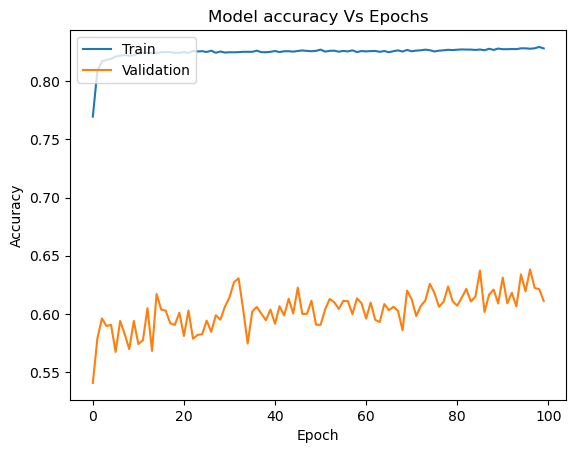

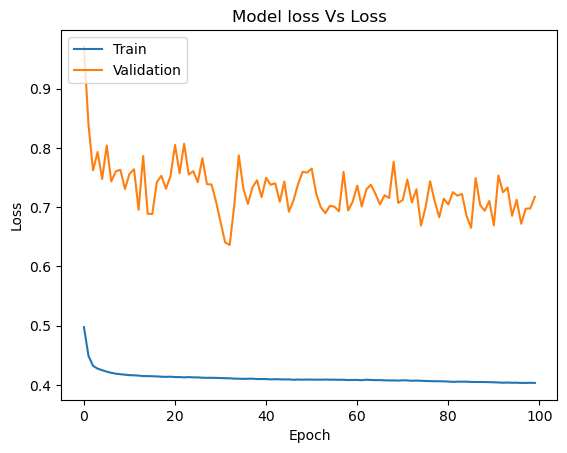

In [242]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy Vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss Vs Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [243]:
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Sequential(
    nn.Linear(15, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Linear(8, 2),
    nn.Softmax())



print(model)

Sequential(
  (0): Linear(in_features=15, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=8, bias=True)
  (5): ReLU()
  (6): Linear(in_features=8, out_features=2, bias=True)
  (7): Softmax(dim=None)
)


In [250]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(tf.keras.layers.Input(shape=(15,)))
classifier.add(Dense(units = 32, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dropout(0.2))
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dropout(0.2))
# Adding the third hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dropout(0.2))
# Adding the second hidden layer
classifier.add(Dense(units = 4, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history = classifier.fit(X_trainK, y_trainK,validation_split = 0.3, batch_size = 10, epochs = 100)

Epoch 1/100
2307/2307 [==============================] - 9s 3ms/step - loss: 10.2586 - accuracy: 0.8238 - val_loss: 0.3516 - val_accuracy: 0.8876
Epoch 2/100
2307/2307 [==============================] - 6s 3ms/step - loss: 0.3886 - accuracy: 0.8863 - val_loss: 0.3515 - val_accuracy: 0.8876
Epoch 3/100
2307/2307 [==============================] - 6s 3ms/step - loss: 0.3678 - accuracy: 0.8873 - val_loss: 0.3515 - val_accuracy: 0.8876
Epoch 4/100
2307/2307 [==============================] - 6s 3ms/step - loss: 0.3575 - accuracy: 0.8875 - val_loss: 0.3515 - val_accuracy: 0.8876
Epoch 5/100
2307/2307 [==============================] - 6s 3ms/step - loss: 0.3540 - accuracy: 0.8874 - val_loss: 0.3515 - val_accuracy: 0.8876
Epoch 6/100
2307/2307 [==============================] - 6s 3ms/step - loss: 0.3520 - accuracy: 0.8875 - val_loss: 0.3516 - val_accuracy: 0.8876
Epoch 7/100
2307/2307 [==============================] - 6s 3ms/step - loss: 0.3517 - accuracy: 0.8876 - val_loss: 0.3518 - val_a

In [260]:
X_test = tf.convert_to_tensor(X_test)
X_test

<tf.Tensor: shape=(16476, 15), dtype=float64, numpy=
array([[ 1.40687843,  1.4752267 , -0.20149216, ..., -0.76417359,
        -0.94817349, -1.12413398],
       [ 1.24001534,  2.03400056, -0.20149216, ...,  0.92058469,
         0.82262174,  0.71591259],
       [-0.59547861, -0.75986873, -0.20149216, ..., -0.76417359,
        -0.94817349, -1.12413398],
       ...,
       [-1.26293095,  1.75461363, -0.20149216, ...,  1.09487003,
         0.70038701, -0.46697449],
       [ 0.32226837,  1.4752267 , -1.81115349, ...,  1.09487003,
        -0.0619717 ,  0.77224054],
       [-0.92920478,  1.4752267 , -0.20149216, ...,  1.09487003,
         0.70038701, -0.46697449]])>

In [296]:
y_pred = classifier(X_test)

In [297]:
y_pred = np.squeeze(y_pred.numpy())
y_pred.shape

(16476,)

In [294]:
y_pred_1 = np.squeeze(y_pred.numpy())
y_pred.shape

TensorShape([16476, 1])

In [289]:
type(y_pred)

tensorflow.python.framework.ops.EagerTensor

In [ ]:
y_pred = y

In [285]:
# y_pred = y_pred.numpy()

In [291]:
y_pred.shape

TensorShape([16476, 1])

In [300]:
threshold = 0.5
y_pred_int = np.array(y_pred >= threshold, dtype='int')
y_pred_int

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
classification_report(y_pred,y_test,zero_division=1)

In [302]:

print(classification_report(y_test,y_pred_int,zero_division=1))

              precision    recall  f1-score   support

           0       0.92      0.62      0.74     14623
           1       0.17      0.59      0.26      1853

    accuracy                           0.62     16476
   macro avg       0.54      0.61      0.50     16476
weighted avg       0.84      0.62      0.69     16476



0